In [2]:

import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import *
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from hyperopt import tpe, Trials, hp, STATUS_OK, fmin

data = pd.read_csv("preprocessed.csv", index_col="id")

### Import and Split Data into Training and Test sets

In [3]:
X = data.drop([ "cardio"], axis=1)
y = data.filter(["cardio"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [4]:
TRIAL_HISTORY = dict()
BEST_ESTIMATORS = dict()

### Parameter tuning for MLPClassifier (Multi-layer Perceptron Network)

In [5]:
def objective(params):
    hidden_layer_sizes=params["hidden_layer_sizes"]
    solver=params["solver"]
    alpha=params["alpha"]
    activation=params["activation"]
    
    model=MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, solver=solver, alpha=alpha, activation=activation, max_iter=1000)
    accuracy = cross_val_score(model, X_train, y_train, cv = 4).mean() # Cross validation for preventing overfitting and giving a fair accuracy result

    return {"loss": -accuracy, "status": STATUS_OK } # Negative accuracy as loss for fmin to find the optimal minimum


def finetune():
    from copy import deepcopy
    
    # Generating a parameters set of increasing number of layers
    layers = [[20, 20]]
    for i in range(7):
        new_layer = deepcopy(layers[0])
        new_layer.append(20)
        layers.append(new_layer)
        
    trials = Trials() # Trials to store trial history
        
    # Creating parameter space
    param_space = dict(
        hidden_layer_sizes = hp.choice("hidden_layer_sizes", layers),
        solver = hp.choice("solver", ["sgd", "adam"]),
        alpha = hp.uniformint("alpha", 0, 20),
        activation = hp.choice("activation", ["logistic", "relu"])
    )
    
    #fmin to find the best parameter in the parameter space
    best=fmin(fn=objective,space=param_space,algo=tpe.suggest,trials=trials,max_evals=50)
    return best, trials # Return the best estimator and trial history

best, trials = finetune()
TRIAL_HISTORY["MLPClassifier"] = trials
BEST_ESTIMATORS["MLPClassifier"] = best
BEST_ESTIMATORS["MLPClassifier"]



100%|██████████| 50/50 [15:29<00:00, 18.59s/trial, best loss: -0.7333747412008281]


{'activation': 1, 'alpha': 1.0, 'hidden_layer_sizes': 0, 'solver': 1}

### Parameter Tuning for Random Forest

In [6]:
def objective(params):

    n_estimators=params["n_estimators"]
    max_depth=params["max_depth"]
    
    model=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    accuracy=cross_val_score(model, X_train, y_train, cv = 4).mean()

    return {"loss": -accuracy, "status": STATUS_OK }



def finetune():    
    param_space = dict(
        n_estimators = hp.uniformint("n_estimators", 5, 200),
        max_depth = hp.uniformint("max_depth", 5, 40)
    )
    trials = Trials()
    
    best=fmin(fn=objective,space=param_space,algo=tpe.suggest,trials=trials,max_evals=50)
    return best, trials

best, trials = finetune()
TRIAL_HISTORY["RandomForestClassifier"] = trials
BEST_ESTIMATORS["RandomForestClassifier"] = best
BEST_ESTIMATORS["RandomForestClassifier"]

100%|██████████| 50/50 [08:56<00:00, 10.74s/trial, best loss: -0.732919254658385] 


{'max_depth': 9.0, 'n_estimators': 178.0}

### Parameter Tuning for HistGradientBoostingClassifier

In [7]:
def objective(params):

    max_depth=params["max_depth"]
    l2_regularization=params["l2_regularization"]
    
    model=HistGradientBoostingClassifier(l2_regularization=l2_regularization, max_depth=max_depth)
    accuracy=cross_val_score(model, X_train, y_train, cv = 4).mean()

    return {"loss": -accuracy, "status": STATUS_OK }



def finetune():    
    param_space = dict(
        l2_regularization = hp.uniformint("l2_regularization", 5, 15),
        max_depth = hp.uniformint("max_depth", 5, 40)
    )
    trials = Trials()
    
    best=fmin(fn=objective,space=param_space,algo=tpe.suggest,trials=trials,max_evals=50)
    return best, trials

best, trials = finetune()
TRIAL_HISTORY["HistGradientBoostingClassifier"] = trials
BEST_ESTIMATORS["HistGradientBoostingClassifier"] = best
BEST_ESTIMATORS["HistGradientBoostingClassifier"]

100%|██████████| 50/50 [01:14<00:00,  1.49s/trial, best loss: -0.7356728778467909]


{'l2_regularization': 5.0, 'max_depth': 36.0}

### Parameter Tuning for Gradient Boosting Classifier

In [ ]:
def objective(params):

    n_estimators=params["n_estimators"]
    max_depth=params["max_depth"]
    
    model=GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth)
    accuracy=cross_val_score(model, X_train, y_train, cv = 4).mean()

    return {"loss": -accuracy, "status": STATUS_OK }



def finetune():    
    param_space = dict(
        n_estimators = hp.uniformint("n_estimators", 5, 200),
        max_depth = hp.uniformint("max_depth", 5, 40)
    )
    trials = Trials()
    
    best=fmin(fn=objective,space=param_space,algo=tpe.suggest,trials=trials,max_evals=50)
    return best, trials

best, trials = finetune()
TRIAL_HISTORY["GradientBoostingClassifier"] = trials
BEST_ESTIMATORS["GradientBoostingClassifier"] = best
BEST_ESTIMATORS["GradientBoostingClassifier"]

### Parameter Tuning for Support Vector Machine

In [ ]:
def objective(params):

    kernel=params["kernel"]
    C = params["C"]
    
    model=SVC(C=C, kernel=kernel)
    accuracy = cross_val_score(model, X_train, y_train, cv = 4).mean()

    return {"loss": -accuracy, "status": STATUS_OK }



def finetune():    
    param_space = dict(
        C = hp.uniformint("C", 1, 20),
        kernel = hp.choice("kernel", ["linear", "rbf"])
    )
    
    trials = Trials()
    best=fmin(fn=objective,space=param_space,algo=tpe.suggest,trials=trials,max_evals=50)
    return best, trials

best, trials = finetune()
TRIAL_HISTORY["SVC"] = trials
BEST_ESTIMATORS["SVC"] = best
BEST_ESTIMATORS["SVC"]

### Plot trial history in terms of each parameter
#### Order: MLPClassifier -> Gradient Boosting Classifier -> SVM

In [ ]:
from hyperopt.plotting import *

for model in TRIAL_HISTORY.keys():
    print(f"Model: \t\t {model}")
    main_plot_vars(TRIAL_HISTORY[model], colorize_best=5, arrange_by_loss=True)

NameError: name 'TRIAL_HISTORY' is not defined

### Plot Loss History 

#### Order: MLPClassifier -> Gradient Boosting Classifier -> SVM

avg best error: -0.7324223602484472


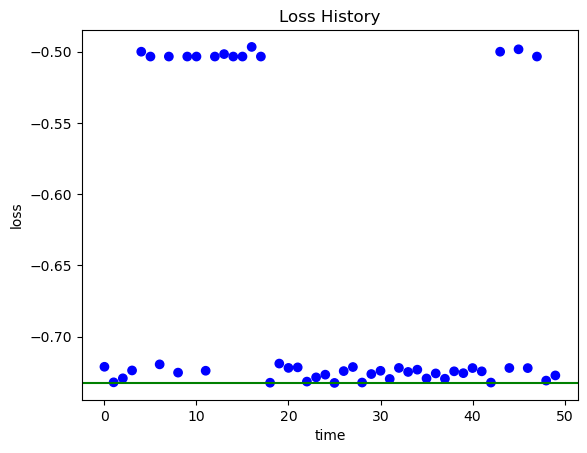

avg best error: -0.735175983436853


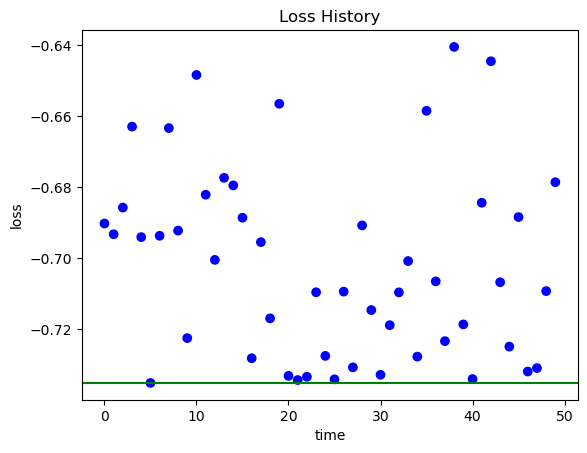

avg best error: -0.7341200828157349


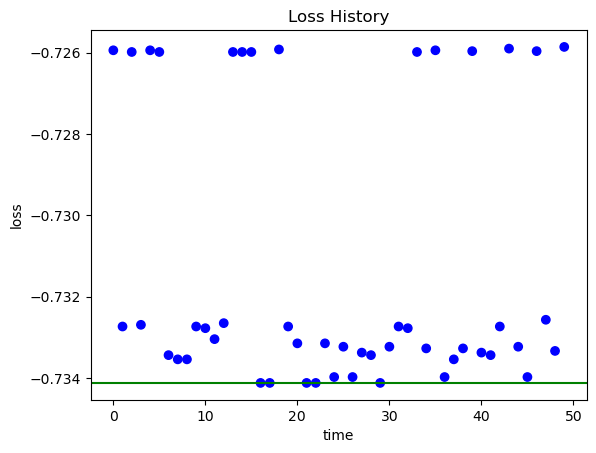

In [ ]:
for model in TRIAL_HISTORY.keys():
    print(f"Model: \t\t {model}")
    main_plot_history(trials=TRIAL_HISTORY[model])

### Demo for hyperparameter space heatmap

In [ ]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

max_depths = np.arange(10, 20)
n_estimators = np.arange(30, 50, 10)

# Prepare a grid for storing accuracy scores
accuracy_scores = np.zeros((len(max_depths), len(n_estimators)))

# Evaluate GradientBoostingClassifier with different hyperparameters
for i, max_depth in enumerate(max_depths):
    for j, n_estimator in enumerate(n_estimators):
        model = GradientBoostingClassifier(max_depth=max_depth, n_estimators=n_estimator, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[i, j] = accuracy

# Create Plotly heatmap
heatmap = go.Heatmap(
    x=n_estimators,
    y=max_depths,
    z=accuracy_scores,
    colorbar=dict(title="Accuracy"),
    colorscale="Viridis",
)

layout = go.Layout(
    title="GradientBoostingClassifier Hyperparameter Space",
    xaxis=dict(title="n_estimators"),
    yaxis=dict(title="max_depth"),
    autosize=False,
    width=800,
    height=600,
)

fig = go.Figure(data=[heatmap], layout=layout)
fig.show()


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin